# Comparing plasticity rules

## For every model, meta-learn on 8-dimensional halfspace dataset, then transfer rules to a NEW instance, and train / test that on the same dataset type but with fixed rules.

Created by Basile Van Hoorick, Fall 2020.

In [1]:
%run FF_common.ipynb

In [2]:
# IMPORTANT: Henceforth, we use GD directly on inputs but use plasticity rules in the output and hidden layers.
opts_up = Options(gd_input=True,
                  use_graph_rule=True,
                  gd_graph_rule=True,
                  use_output_rule=True,
                  gd_output_rule=True,
                  gd_output=False)
opts_down = Options(gd_input=True,
                    use_graph_rule=True,
                    gd_graph_rule=False,  # Not meta-trainable anymore!
                    use_output_rule=True,
                    gd_output_rule=False,  # Not meta-trainable anymore!
                    gd_output=False)
if 1:
    scheme = UpdateScheme(cross_entropy_loss=True,
                          mse_loss=False,
                          update_misclassified_only=False,
                          update_all_edges=True)
else:
    # Same as paper.
    scheme = UpdateScheme(cross_entropy_loss=True,
                          mse_loss=False,
                          update_misclassified_only=True,
                          update_all_edges=False)

# Feed-forward brain config.
n_up = 8  # Input layer size for meta-learning.
n_down = 8  # Input layer size for desired task training.
m = 2  # Output layer size.
l = 2  # Number of hidden layers.
w = 32  # Width of hidden layers.
p = 0.5  # Connectivity probability.
cap = 16  # Number of nodes firing per layer.

# Training config.
num_runs = 5
num_rule_epochs = 50
num_epochs_upstream = 1
num_epochs_downstream = 1
downstream_backprop = False
dataset_up = 'halfspace'
dataset_down = 'halfspace'

In [3]:
# Instantiate brain factories.
brain_rnn_up_fact = lambda: LocalNet(n_up, m, w, p, cap, 1, options=opts_up, update_scheme=scheme)
brain_rnn_down_fact = lambda: LocalNet(n_down, m, w, p, cap, 1, options=opts_down, update_scheme=scheme)

In [4]:
# Evaluate model.
print('==== Original RNN (very different from all the rest) ====')
stats_rnn_up, stats_rnn_down = evaluate_up_down(
    brain_rnn_up_fact, brain_rnn_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)

  0%|          | 0/50 [00:00<?, ?it/s]

==== Original RNN (very different from all the rest) ====

Run 1 / 5...
Meta-learning on halfspace...


100%|██████████| 50/50 [01:37<00:00,  1.95s/it]
../LocalNetBase.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.rnn_rule = torch.tensor(rule).flatten().double()
  3%|▎         | 49/1500 [00:00<00:03, 481.96it/s]

Last loss: 0.3885
Last train accuracy: 0.9227
Last test accuracy: 0.9280
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.6313
INITIAL test accuracy: 0.5820
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5819
Last train accuracy: 0.7360
Last test accuracy: 0.7280


Run 2 / 5...
Meta-learning on halfspace...


  3%|▎         | 48/1500 [00:00<00:03, 479.80it/s]

Last loss: 0.3813
Last train accuracy: 0.9447
Last test accuracy: 0.9360
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4720
INITIAL test accuracy: 0.4680
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6034
Last train accuracy: 0.6960
Last test accuracy: 0.6740


Run 3 / 5...
Meta-learning on halfspace...


  4%|▍         | 59/1500 [00:00<00:02, 587.32it/s]

Last loss: 0.3653
Last train accuracy: 0.9500
Last test accuracy: 0.9600
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4460
INITIAL test accuracy: 0.4300
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5529
Last train accuracy: 0.7653
Last test accuracy: 0.7820


Run 4 / 5...
Meta-learning on halfspace...


  4%|▍         | 61/1500 [00:00<00:02, 602.81it/s]

Last loss: 0.3590
Last train accuracy: 0.9720
Last test accuracy: 0.9760
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.6880
INITIAL test accuracy: 0.7140
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5988
Last train accuracy: 0.7213
Last test accuracy: 0.7200


Run 5 / 5...
Meta-learning on halfspace...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.3913
Last train accuracy: 0.9160
Last test accuracy: 0.9400
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.6747
INITIAL test accuracy: 0.6360
Epoch 1 / 1 ...


100%|██████████| 1500/1500 [00:03<00:00, 413.79it/s]


Last loss: 0.5217
Last train accuracy: 0.8267
Last test accuracy: 0.8000



Saving figure to: figs/comparing_transfer_rnn_halfspace


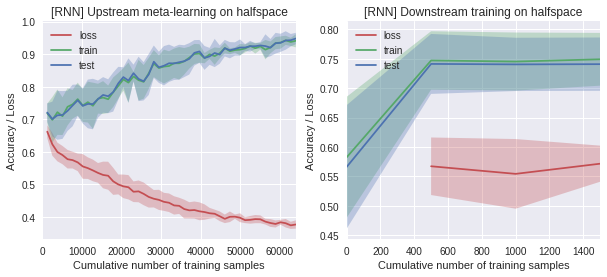

Mean essential stats across all runs:
Last upstream loss: 0.3771
Last upstream train accuracy: 0.9411
Last upstream test accuracy: 0.9480
Last downstream loss: 0.5718
Last downstream train accuracy: 0.7491
Last downstream test accuracy: 0.7408



In [5]:
# Plot aggregated stats.
agg_stats_rnn_up = convert_multi_stats_uncertainty(stats_rnn_up)
agg_stats_rnn_down = convert_multi_stats_uncertainty(stats_rnn_down)
plot_curves(agg_stats_rnn_up, agg_stats_rnn_down,
            '[RNN] Upstream meta-learning on ' + dataset_up,
            '[RNN] Downstream training on ' + dataset_down,
            'figs/comparing_transfer_rnn_' + dataset_up)

## Evaluate all table-based feed-forward networks.

In [6]:
# Instantiate brain factories.
brain_prepost_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_up, update_scheme=scheme)
brain_prepost_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_down, update_scheme=scheme)
brain_prepostcount_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts_up, update_scheme=scheme)
brain_prepostcount_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts_down, update_scheme=scheme)
brain_prepostpercent_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PrePostPercent(),
    output_rule=TableRule_PrePostPercent(), options=opts_up, update_scheme=scheme)
brain_prepostpercent_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PrePostPercent(),
    output_rule=TableRule_PrePostPercent(), options=opts_down, update_scheme=scheme)
brain_postcount_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PostCount(),
    output_rule=TableRule_PostCount(), options=opts_up, update_scheme=scheme)
brain_postcount_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PostCount(),
    output_rule=TableRule_PostCount(), options=opts_down, update_scheme=scheme)

In [7]:
# Evaluate models.
print('==== Interpretation: Pre and Post ====')
stats_prepost_up, stats_prepost_down = evaluate_up_down(
    brain_prepost_up_fact, brain_prepost_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Pre and Post and Incoming Count ====')
stats_prepostcount_up, stats_prepostcount_down = evaluate_up_down(
    brain_prepostcount_up_fact, brain_prepostcount_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Pre and Post and Binned Incoming Fraction ====')
stats_prepostpercent_up, stats_prepostpercent_down = evaluate_up_down(
    brain_prepostpercent_up_fact, brain_prepostpercent_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Post and Incoming Count ====')
stats_postcount_up, stats_postcount_down = evaluate_up_down(
    brain_postcount_up_fact, brain_postcount_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream,
    min_upstream_acc=0.4)

  0%|          | 0/50 [00:00<?, ?it/s]

==== Interpretation: Pre and Post ====

Run 1 / 5...
Meta-learning on halfspace...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.3916
Last train accuracy: 0.9180
Last test accuracy: 0.8860
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5100
INITIAL test accuracy: 0.5180
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5736
Last train accuracy: 0.7473
Last test accuracy: 0.7480


Run 2 / 5...
Meta-learning on halfspace...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.3891
Last train accuracy: 0.9280
Last test accuracy: 0.9400
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5060
INITIAL test accuracy: 0.5240
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5901
Last train accuracy: 0.7293
Last test accuracy: 0.7380


Run 3 / 5...
Meta-learning on halfspace...


  3%|▎         | 50/1500 [00:00<00:02, 495.88it/s]

Last loss: 0.4070
Last train accuracy: 0.9140
Last test accuracy: 0.9280
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5013
INITIAL test accuracy: 0.5220
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5963
Last train accuracy: 0.7240
Last test accuracy: 0.7460


Run 4 / 5...
Meta-learning on halfspace...


  3%|▎         | 51/1500 [00:00<00:02, 508.69it/s]

Last loss: 0.4299
Last train accuracy: 0.8927
Last test accuracy: 0.8700
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4920
INITIAL test accuracy: 0.4920
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5469
Last train accuracy: 0.7747
Last test accuracy: 0.7800


Run 5 / 5...
Meta-learning on halfspace...


  3%|▎         | 49/1500 [00:00<00:03, 481.76it/s]

Last loss: 0.4574
Last train accuracy: 0.8693
Last test accuracy: 0.8600
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5020
INITIAL test accuracy: 0.4820
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5284
Last train accuracy: 0.7860
Last test accuracy: 0.8020

==== Interpretation: Pre and Post and Incoming Count ====

Run 1 / 5...
Meta-learning on halfspace...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.3869
Last train accuracy: 0.9447
Last test accuracy: 0.9360
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5300
INITIAL test accuracy: 0.4740
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5571
Last train accuracy: 0.7480
Last test accuracy: 0.7360


Run 2 / 5...
Meta-learning on halfspace...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4149
Last train accuracy: 0.9027
Last test accuracy: 0.8800
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5000
INITIAL test accuracy: 0.5340
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5176
Last train accuracy: 0.7913
Last test accuracy: 0.8040


Run 3 / 5...
Meta-learning on halfspace...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4216
Last train accuracy: 0.8873
Last test accuracy: 0.8740
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5247
INITIAL test accuracy: 0.4860
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5306
Last train accuracy: 0.7953
Last test accuracy: 0.7640


Run 4 / 5...
Meta-learning on halfspace...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.3943
Last train accuracy: 0.9287
Last test accuracy: 0.9160
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5000
INITIAL test accuracy: 0.4840
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5246
Last train accuracy: 0.8107
Last test accuracy: 0.7940


Run 5 / 5...
Meta-learning on halfspace...


  3%|▎         | 47/1500 [00:00<00:03, 467.66it/s]

Last loss: 0.4080
Last train accuracy: 0.9120
Last test accuracy: 0.9100
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4893
INITIAL test accuracy: 0.4840
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7253
Last train accuracy: 0.6293
Last test accuracy: 0.6140

==== Interpretation: Pre and Post and Binned Incoming Fraction ====

Run 1 / 5...
Meta-learning on halfspace...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4147
Last train accuracy: 0.8973
Last test accuracy: 0.8620
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4867
INITIAL test accuracy: 0.4720
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5039
Last train accuracy: 0.8247
Last test accuracy: 0.8420


Run 2 / 5...
Meta-learning on halfspace...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4087
Last train accuracy: 0.9167
Last test accuracy: 0.9140
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5260
INITIAL test accuracy: 0.4880
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6157
Last train accuracy: 0.7273
Last test accuracy: 0.7460


Run 3 / 5...
Meta-learning on halfspace...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4108
Last train accuracy: 0.8980
Last test accuracy: 0.9140
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5187
INITIAL test accuracy: 0.5020
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5646
Last train accuracy: 0.7400
Last test accuracy: 0.7380


Run 4 / 5...
Meta-learning on halfspace...


  2%|▏         | 23/1500 [00:00<00:06, 212.51it/s]

Last loss: 0.4105
Last train accuracy: 0.9100
Last test accuracy: 0.8900
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5133
INITIAL test accuracy: 0.5040
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.6410
Last train accuracy: 0.6667
Last test accuracy: 0.6560


Run 5 / 5...
Meta-learning on halfspace...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4641
Last train accuracy: 0.8520
Last test accuracy: 0.8580
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4867
INITIAL test accuracy: 0.4840
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.5376
Last train accuracy: 0.7700
Last test accuracy: 0.7480

==== Interpretation: Post and Incoming Count ====

Run 1 / 5...
Meta-learning on halfspace...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.6931
Last train accuracy: 0.5080
Last test accuracy: 0.5420
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5087
INITIAL test accuracy: 0.5000
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7065
Last train accuracy: 0.5087
Last test accuracy: 0.5000


Run 2 / 5...
Meta-learning on halfspace...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.6910
Last train accuracy: 0.4933
Last test accuracy: 0.4600
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5033
INITIAL test accuracy: 0.4840
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.8043
Last train accuracy: 0.5033
Last test accuracy: 0.4840


Run 3 / 5...
Meta-learning on halfspace...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.6912
Last train accuracy: 0.4920
Last test accuracy: 0.5160
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.4680
INITIAL test accuracy: 0.4700
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7379
Last train accuracy: 0.5320
Last test accuracy: 0.5300


Run 4 / 5...
Meta-learning on halfspace...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.6874
Last train accuracy: 0.5173
Last test accuracy: 0.4720
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5107
INITIAL test accuracy: 0.5100
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 0.7716
Last train accuracy: 0.5107
Last test accuracy: 0.5100


Run 5 / 5...
Meta-learning on halfspace...


  0%|          | 0/1500 [00:00<?, ?it/s]

Last loss: 0.6778
Last train accuracy: 0.5300
Last test accuracy: 0.4760
Training NEW brain instance on halfspace...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.5273
INITIAL test accuracy: 0.4340
Epoch 1 / 1 ...


100%|██████████| 1500/1500 [00:03<00:00, 419.59it/s]


Last loss: 0.7693
Last train accuracy: 0.5273
Last test accuracy: 0.4340



Saving figure to: figs/comparing_transfer_prepost_halfspace


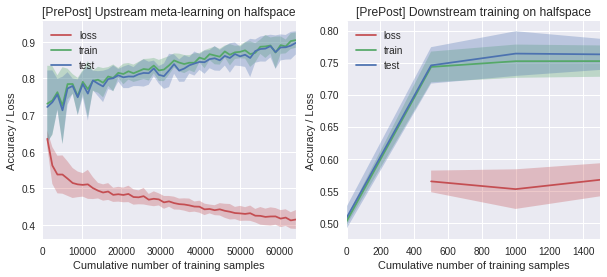

Mean essential stats across all runs:
Last upstream loss: 0.4150
Last upstream train accuracy: 0.9044
Last upstream test accuracy: 0.8968
Last downstream loss: 0.5670
Last downstream train accuracy: 0.7523
Last downstream test accuracy: 0.7628

Saving figure to: figs/comparing_transfer_prepostcount_halfspace


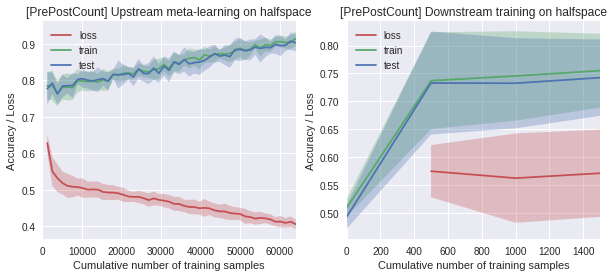

Mean essential stats across all runs:
Last upstream loss: 0.4052
Last upstream train accuracy: 0.9151
Last upstream test accuracy: 0.9032
Last downstream loss: 0.5710
Last downstream train accuracy: 0.7549
Last downstream test accuracy: 0.7424

Saving figure to: figs/comparing_transfer_prepostpercent_halfspace


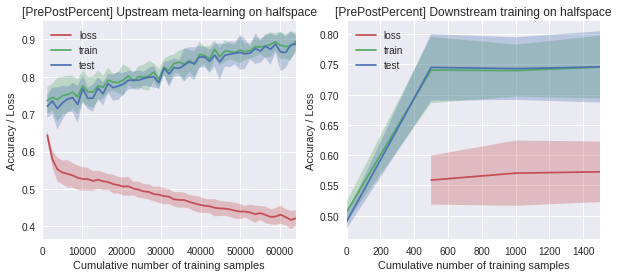

Mean essential stats across all runs:
Last upstream loss: 0.4218
Last upstream train accuracy: 0.8948
Last upstream test accuracy: 0.8876
Last downstream loss: 0.5726
Last downstream train accuracy: 0.7457
Last downstream test accuracy: 0.7460

Saving figure to: figs/comparing_transfer_postcount_halfspace


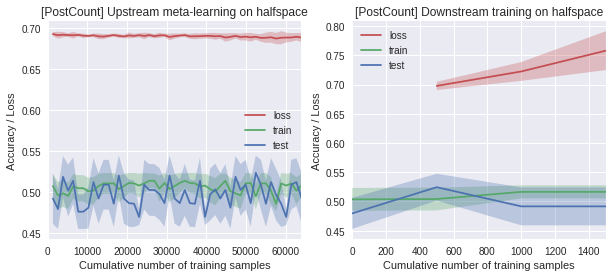

Mean essential stats across all runs:
Last upstream loss: 0.6881
Last upstream train accuracy: 0.5081
Last upstream test accuracy: 0.4932
Last downstream loss: 0.7579
Last downstream train accuracy: 0.5164
Last downstream test accuracy: 0.4916



In [8]:
# Plot aggregated stats.
agg_stats_prepost_up = convert_multi_stats_uncertainty(stats_prepost_up)
agg_stats_prepost_down = convert_multi_stats_uncertainty(stats_prepost_down)
plot_curves(agg_stats_prepost_up, agg_stats_prepost_down,
            '[PrePost] Upstream meta-learning on ' + dataset_up,
            '[PrePost] Downstream training on ' + dataset_down,
            'figs/comparing_transfer_prepost_' + dataset_up)
agg_stats_prepostcount_up = convert_multi_stats_uncertainty(stats_prepostcount_up)
agg_stats_prepostcount_down = convert_multi_stats_uncertainty(stats_prepostcount_down)
plot_curves(agg_stats_prepostcount_up, agg_stats_prepostcount_down,
            '[PrePostCount] Upstream meta-learning on ' + dataset_up,
            '[PrePostCount] Downstream training on ' + dataset_down,
            'figs/comparing_transfer_prepostcount_' + dataset_up)
agg_stats_prepostpercent_up = convert_multi_stats_uncertainty(stats_prepostpercent_up)
agg_stats_prepostpercent_down = convert_multi_stats_uncertainty(stats_prepostpercent_down)
plot_curves(agg_stats_prepostpercent_up, agg_stats_prepostpercent_down,
            '[PrePostPercent] Upstream meta-learning on ' + dataset_up,
            '[PrePostPercent] Downstream training on ' + dataset_down,
            'figs/comparing_transfer_prepostpercent_' + dataset_up)
agg_stats_postcount_up = convert_multi_stats_uncertainty(stats_postcount_up)
agg_stats_postcount_down = convert_multi_stats_uncertainty(stats_postcount_down)
plot_curves(agg_stats_postcount_up, agg_stats_postcount_down,
            '[PostCount] Upstream meta-learning on ' + dataset_up,
            '[PostCount] Downstream training on ' + dataset_down,
            'figs/comparing_transfer_postcount_' + dataset_up)

Saving figure to: figs/comparing_transfer_table_halfspace


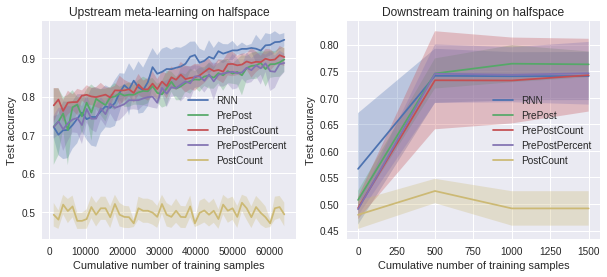

In [9]:
# Plot to compare all.
all_stats_up = [agg_stats_rnn_up, agg_stats_prepost_up, agg_stats_prepostcount_up, agg_stats_prepostpercent_up, agg_stats_postcount_up]
all_stats_down = [agg_stats_rnn_down, agg_stats_prepost_down, agg_stats_prepostcount_down, agg_stats_prepostpercent_down, agg_stats_postcount_down]
labels = ['RNN', 'PrePost', 'PrePostCount', 'PrePostPercent', 'PostCount']
plot_compare_models(all_stats_up, all_stats_down, labels,
                    'Upstream meta-learning on ' + dataset_up,
                    'Downstream training on ' + dataset_down,
                    'figs/comparing_transfer_table_' + dataset_up)

In [10]:
if 0:
    agg_stats_prepost_up = convert_multi_stats_uncertainty(stats_prepost_up)
    agg_stats_prepost_down = convert_multi_stats_uncertainty(stats_prepost_down)
    for i in range(len(stats_prepost_up)):
        plot_curves(stats_prepost_up[i], stats_prepost_down[i],
                    '[PrePost] Upstream meta-learning on ' + dataset_up,
                    '[PrePost] Downstream training on ' + dataset_down)